<a href="https://colab.research.google.com/github/shivam-karma/amazon-sales-data-analyst/blob/main/top%20companies%20financial%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [11]:
# read in the "financial analytics file" as a pandas dataframe
Data = pd.read_csv('/content/Financial Analytics data.csv')


In [3]:
# Take a brief look at the data
Data.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN
487,500,L T Foods,NaN,NaN,NaN


In [4]:
Data.shape

(488, 5)

In [5]:
Data.index

RangeIndex(start=0, stop=488, step=1)

In [6]:
Data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [12]:
# Verify and clean column names
Data.columns = Data.columns.str.strip()
Data = Data.rename(columns={
    'Serial NumberName': 'Serial Number',
    'Name of Company': 'Name of Company',
    'Mar Cap – Crore': 'Mar Cap - Crore',
    'Sales Qtr – Crore': 'Sales Qtr - Crore'
})

# Clean the data
Data_cleaned = Data.dropna(subset=['Mar Cap - Crore', 'Sales Qtr - Crore'])
Data_cleaned['Mar Cap - Crore'] = Data_cleaned['Mar Cap - Crore'].astype(float)
Data_cleaned['Sales Qtr - Crore'] = Data_cleaned['Sales Qtr - Crore'].astype(float)



<ipython-input-12-34ab8757f03c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['Mar Cap - Crore'] = Data_cleaned['Mar Cap - Crore'].astype(float)
<ipython-input-12-34ab8757f03c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['Sales Qtr - Crore'] = Data_cleaned['Sales Qtr - Crore'].astype(float)


Key Metrics Identification:

Market Capitalization (Mar Cap):
Top companies by market cap.
Distribution of market cap across all companies.
Quarterly Sales (Sales Qtr):
Top companies by quarterly sales.
Distribution of quarterly sales.
Correlation Analysis:
Relationship between market cap and quarterly sales.
Outliers:
Identify companies with significantly high market cap or sales.

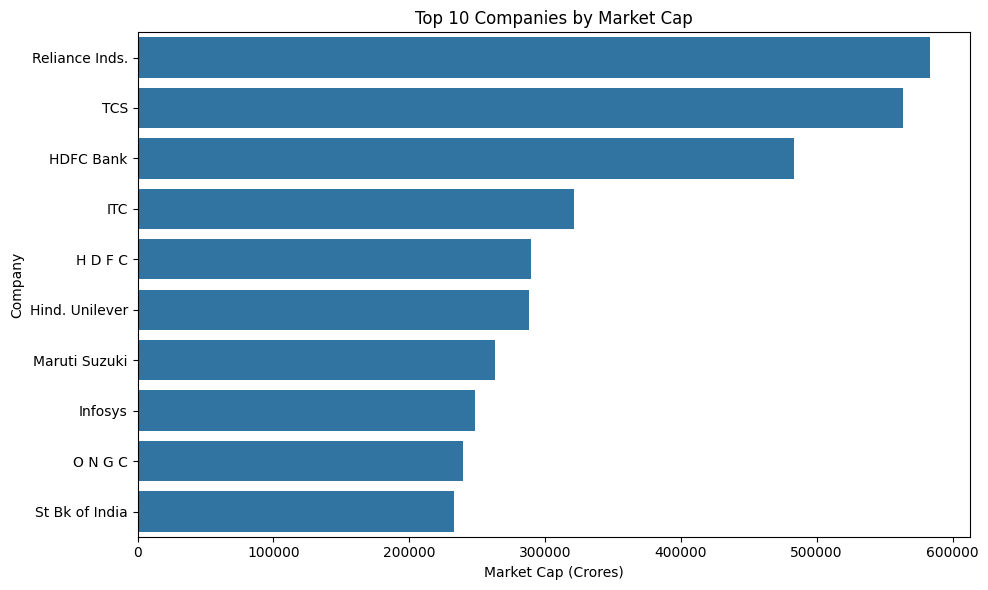

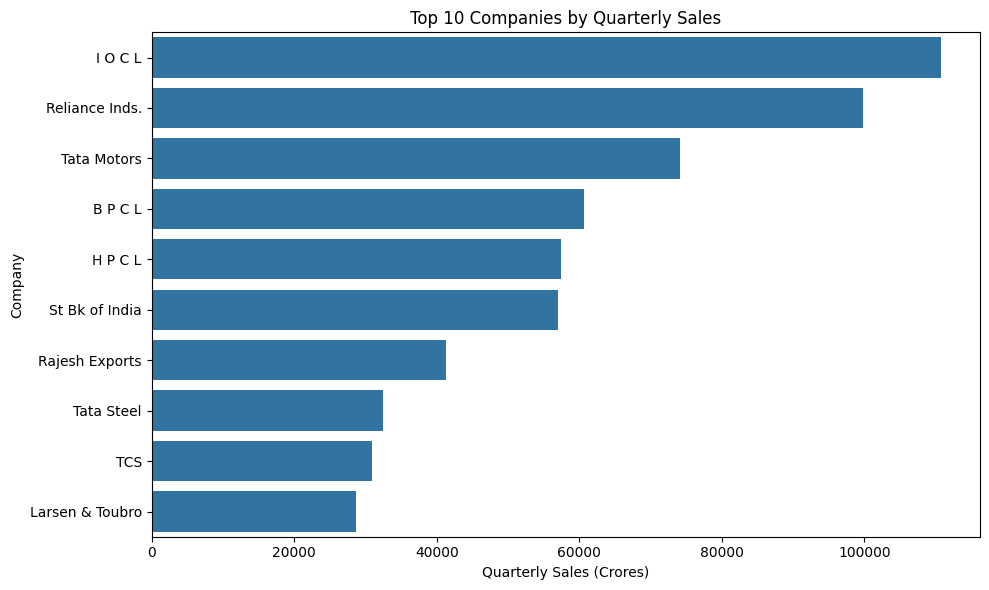

In [24]:

### 1. Key Metrics Identification

# Top Companies by Market Cap
top_market_cap = Data_cleaned.nlargest(10, 'Mar Cap - Crore')
top_market_cap.to_csv('Top_Market_Cap.csv', index=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_market_cap, x='Mar Cap - Crore', y='Name')
plt.title('Top 10 Companies by Market Cap')
plt.xlabel('Market Cap (Crores)')
plt.ylabel('Company')
plt.tight_layout()
plt.savefig('top_market_cap.png')
# plt.clf()

# Top Companies by Quarterly Sales
top_quarterly_sales = Data_cleaned.nlargest(10, 'Sales Qtr - Crore')
top_quarterly_sales.to_csv('Top_Quarterly_Sales.csv', index=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_quarterly_sales, x='Sales Qtr - Crore', y='Name')
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Quarterly Sales (Crores)')
plt.ylabel('Company')
plt.tight_layout()
# plt.savefig('top_quarterly_sales.png')
# plt.clf()
plt.show()

# Descriptive Statistics
desc_stats = Data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe()
desc_stats.to_csv('Descriptive_Statistics.csv')

Factor Analysis:

Sector-wise Comparison:
If sector data is available, analyze market cap and sales across different sectors.
Clustering:
Group companies based on similar characteristics (e.g., market cap and sales)

<ipython-input-19-2d88c3ba6e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['Market Cap Outlier'] = Data_cleaned['Mar Cap - Crore'] > Data_cleaned['Mar Cap - Crore'].quantile(0.95)
<ipython-input-19-2d88c3ba6e96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['Sales Outlier'] = Data_cleaned['Sales Qtr - Crore'] > Data_cleaned['Sales Qtr - Crore'].quantile(0.95)


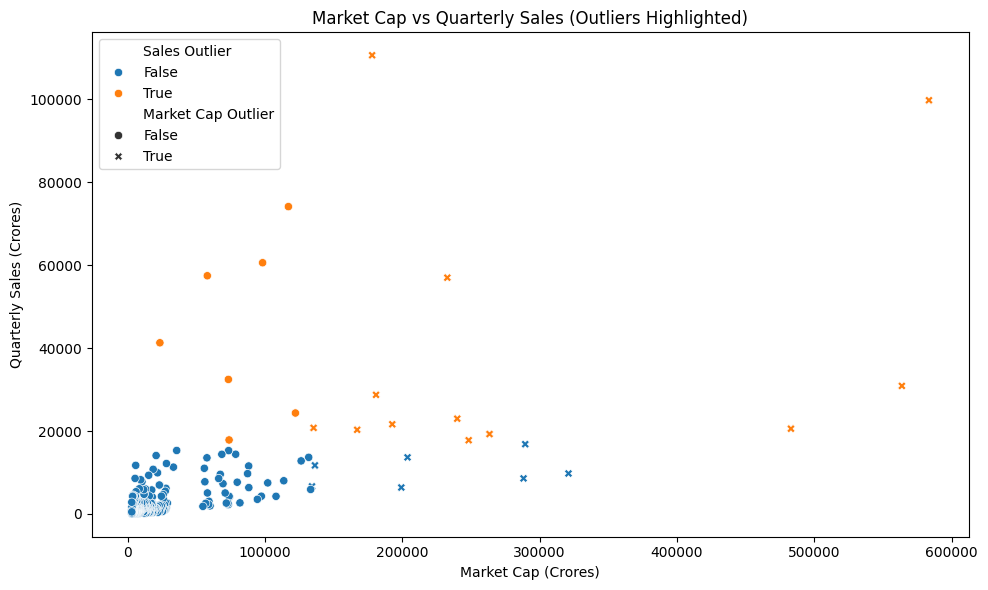

In [19]:
# Outlier Detection
Data_cleaned['Market Cap Outlier'] = Data_cleaned['Mar Cap - Crore'] > Data_cleaned['Mar Cap - Crore'].quantile(0.95)
Data_cleaned['Sales Outlier'] = Data_cleaned['Sales Qtr - Crore'] > Data_cleaned['Sales Qtr - Crore'].quantile(0.95)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data_cleaned, x='Mar Cap - Crore', y='Sales Qtr - Crore', style='Market Cap Outlier', hue='Sales Outlier')
plt.title('Market Cap vs Quarterly Sales (Outliers Highlighted)')
plt.xlabel('Market Cap (Crores)')
plt.ylabel('Quarterly Sales (Crores)')
plt.tight_layout()
plt.savefig('market_cap_vs_sales_outliers.png')
# plt.clf()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-c82fda6b4077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned['Cluster'] = kmeans.fit_predict(Data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']])


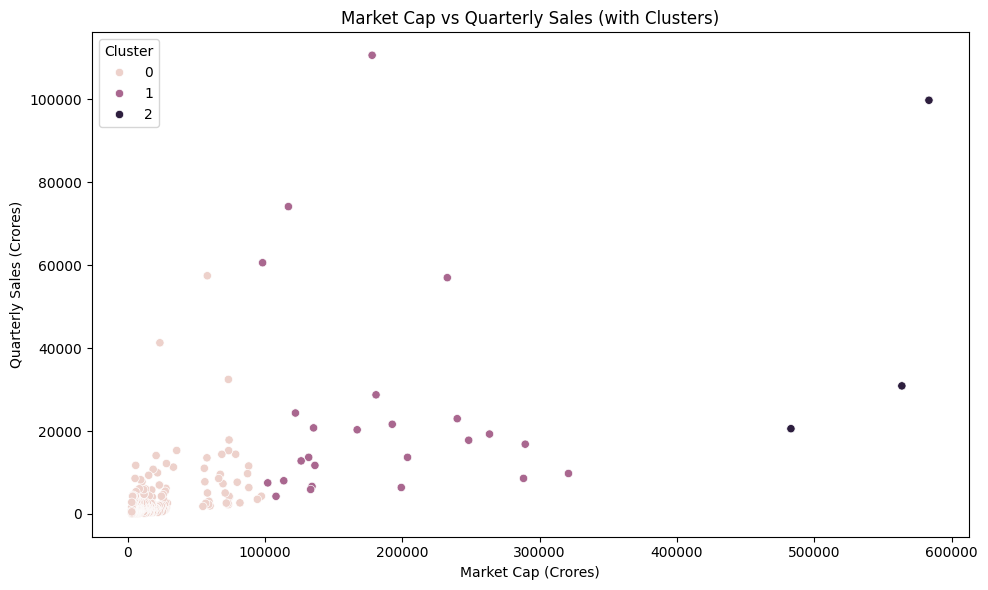

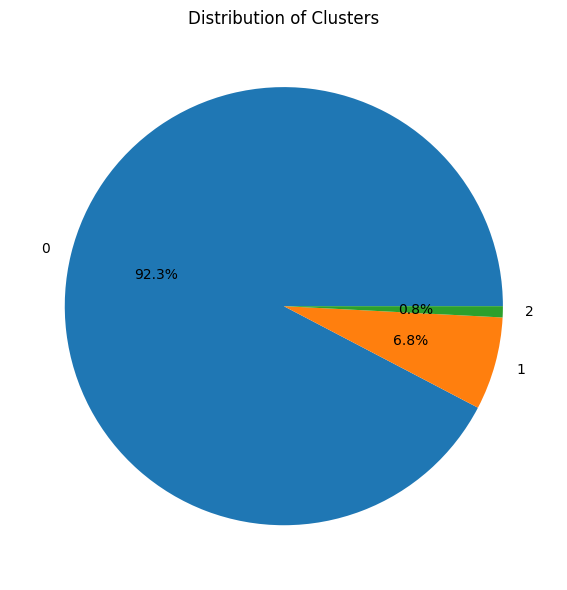

In [22]:
# Clustering Analysis
kmeans = KMeans(n_clusters=3, random_state=42)
Data_cleaned['Cluster'] = kmeans.fit_predict(Data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']])

Data_cleaned.to_csv('Clustered_Data.csv', index=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data_cleaned, x='Mar Cap - Crore', y='Sales Qtr - Crore', hue='Cluster')
plt.title('Market Cap vs Quarterly Sales (with Clusters)')
plt.xlabel('Market Cap (Crores)')
plt.ylabel('Quarterly Sales (Crores)')
plt.tight_layout()
plt.savefig('market_cap_vs_sales_with_clusters.png')
# plt.clf()

plt.figure(figsize=(10, 6))
plt.pie(Data_cleaned['Cluster'].value_counts(), labels=Data_cleaned['Cluster'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Clusters')
plt.tight_layout()
plt.savefig('clusters_distribution.png')
# plt.clf()

Meaningful Relationships:

Correlation Heatmap:
Visualize relationships between numerical attributes.
Scatter Plots:
Visualize the relationship between market cap and quarterly sales

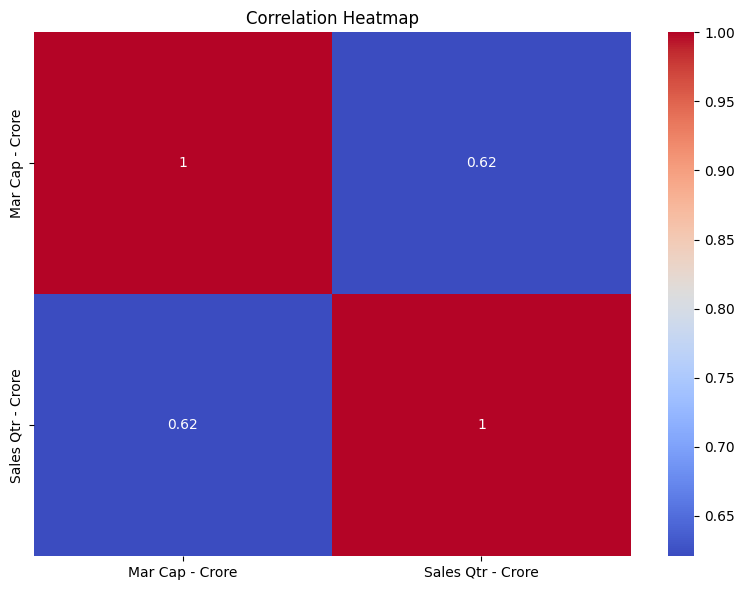

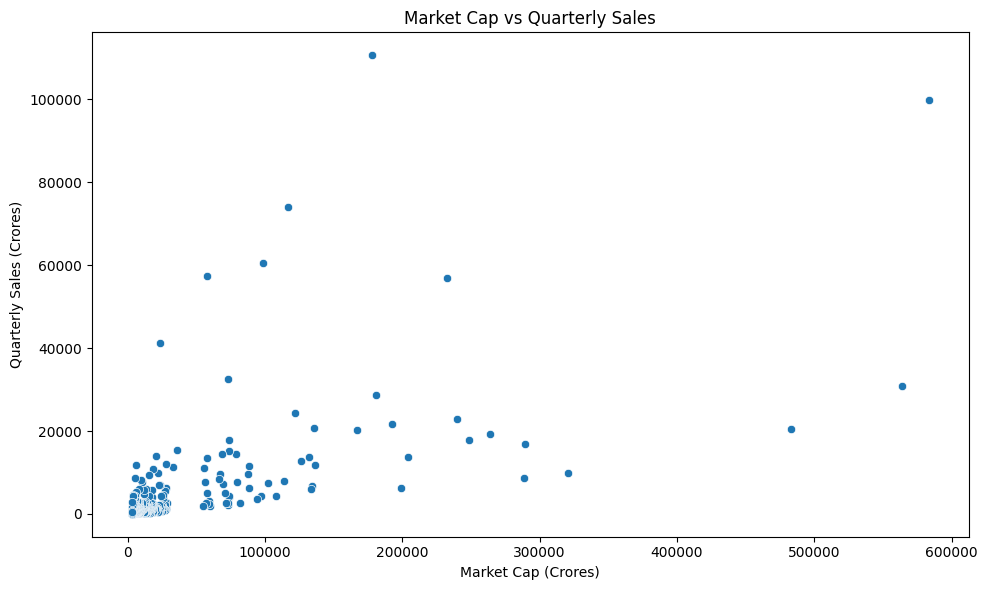

In [23]:
# Correlation Analysis
correlation = Data_cleaned[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
# plt.clf()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data_cleaned, x='Mar Cap - Crore', y='Sales Qtr - Crore')
plt.title('Market Cap vs Quarterly Sales')
plt.xlabel('Market Cap (Crores)')
plt.ylabel('Quarterly Sales (Crores)')
plt.tight_layout()
plt.savefig('market_cap_vs_sales.png')
# plt.clf()